In [9]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn,optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# from torchvision.transforms import ToTensor, Lambda



In [21]:
# class NN(nn.Module):
#     def __init__(self, num_classes):
#         super(NN, self).__init__()

#         self.block_1 = nn.Sequential(
#                 nn.Conv2d(in_channels=1,
#                           out_channels=64,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           # (1(32-1)- 32 + 3)/2 = 1
#                           padding=1), 
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=64,
#                           out_channels=64,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))
#         )
        
#         self.block_2 = nn.Sequential(
#                 nn.Conv2d(in_channels=64,
#                           out_channels=128,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=128,
#                           out_channels=128,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))
#         )
        
#         self.block_3 = nn.Sequential(        
#                 nn.Conv2d(in_channels=128,
#                           out_channels=256,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=256,
#                           out_channels=256,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),        
#                 nn.Conv2d(in_channels=256,
#                           out_channels=256,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=256,
#                           out_channels=256,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))
#         )
        
          
#         self.block_4 = nn.Sequential(   
#                 nn.Conv2d(in_channels=256,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),        
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),        
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),   
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))
#         )
        
#         self.block_5 = nn.Sequential(
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),            
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),            
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),
#                 nn.Conv2d(in_channels=512,
#                           out_channels=512,
#                           kernel_size=(3, 3),
#                           stride=(1, 1),
#                           padding=1),
#                 nn.ReLU(),   
#                 nn.MaxPool2d(kernel_size=(2, 2),
#                              stride=(2, 2))             
#         )
        
#         self.classifier = nn.Sequential(
#                 nn.Linear(512*2*2, 4096),
#                 nn.ReLU(),   
#                 nn.Linear(4096, 4096),
#                 nn.ReLU(),
#                 nn.Linear(4096, num_classes)
#         )
#         for m in self.modules():
#             if isinstance(m, torch.nn.Conv2d):
#                 #n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
#                 #m.weight.data.normal_(0, np.sqrt(2. / n))
#                 m.weight.detach().normal_(0, 0.05)
#                 if m.bias is not None:
#                     m.bias.detach().zero_()
#             elif isinstance(m, torch.nn.Linear):
#                 m.weight.detach().normal_(0, 0.05)
#                 m.bias.detach().detach().zero_()
        
#     def forward(self, x):

#         x = self.block_1(x)
#         x = self.block_2(x)
#         x = self.block_3(x)
#         x = self.block_4(x)
#         x = self.block_5(x)

#         logits = self.classifier(x.view(-1, 512*2*2))
#         pred = F.softmax(logits, dim=1)

#         return logits,pred
class NN(nn.Module):
    def __init__(self, num_classes):
        super(NN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,num_classes),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        pred = F.softmax(logits, dim=1)

        return logits,pred

In [24]:
# def train(model, epochs, train_loader, optimizer, loss_fn, train_loss_list, train_acc_list, device):
#     size = len(train_loader.dataset)
#     # loss_fn = nn.CrossEntropyLoss()
#     # optimizer = optim.Adam(model.parameters(), lr=0.001)
#     for epoch in range(epochs):
#         correct = 0
#         model.train()
#         print(f'Epoch {epoch+1}\n-------------------------------')
#         for i, (x, y) in enumerate(train_loader):
#             optimizer.zero_grad()
#             x, y = x.to(device), y.to(device)
#             logits, pred = model.forward(x)
#             y_pred = pred.argmax(dim=1)
#             loss = loss_fn(y_pred, y)
#             loss.backward()
#             optimizer.step()
#             if (i+1) % 16 == 0:
#                 loss, current = loss.item(), (i+1) * len(x)
#                 print(f'Loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')

def train_loop(model, train_loader, optimizer, loss_fn, train_loss_list, train_acc_list, device):
    size = len(train_loader.dataset)
    # loss_fn = nn.CrossEntropyLoss()
    # optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_loss, correct = 0, 0
    for i, (x, y) in enumerate(train_loader):
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        # print(x.shape)
        # print(y.shape)
        logits, pred = model.forward(x)
        # print(pred.shape)
        y_pred = pred.argmax(dim=1)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        correct += (y_pred == y).type(torch.float).sum().item()
        if (i+1) % 16 == 0:
            loss, current = loss.item(), (i+1) * len(x)
            print(f'Loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')
    train_loss /= size
    correct /= size
    train_loss_list.append(train_loss)
    train_acc_list.append(correct)

def test_loop(model, test_loader, loss_fn, device, test_loss_list, test_acc_list):
    size = len(test_loader.dataset)
    test_loss, correct = 0,0

    with torch.no_grad():
        for x,y in test_loader:
            x, y = x.to(device), y.to(device)
            logits, pred = model.forward(x)
            y_pred = pred.argmax(dim=1)

            test_loss += loss_fn(pred,y).item()
            correct += (y_pred == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size

    test_loss_list.append(test_loss)
    test_acc_list.append(correct)

    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')


(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 9)
torch.Size([1, 32, 32])


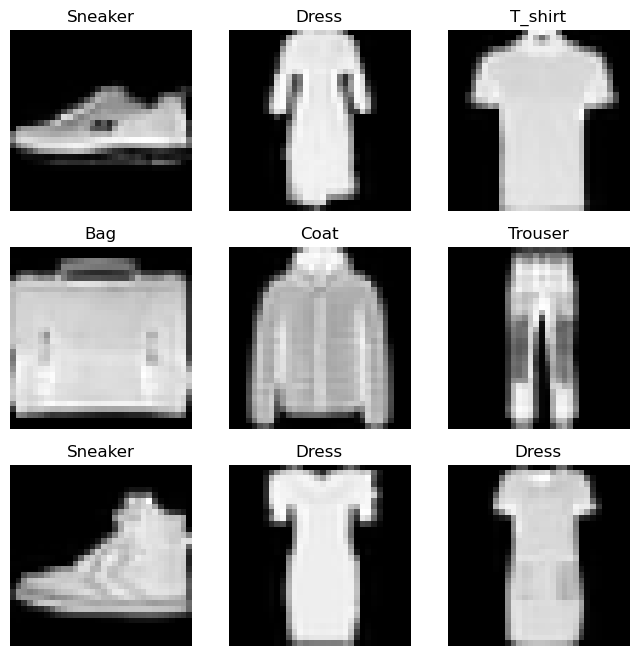

Epoch 1
-------------------------------
Loss: 2.287584  [ 1024/60000]
Loss: 2.228179  [ 2048/60000]
Loss: 2.161647  [ 3072/60000]
Loss: 2.007958  [ 4096/60000]
Loss: 2.058382  [ 5120/60000]
Loss: 1.908834  [ 6144/60000]
Loss: 2.029009  [ 7168/60000]
Loss: 1.908130  [ 8192/60000]
Loss: 1.949721  [ 9216/60000]
Loss: 1.846420  [10240/60000]
Loss: 1.898970  [11264/60000]
Loss: 1.888623  [12288/60000]
Loss: 1.967271  [13312/60000]
Loss: 1.946810  [14336/60000]
Loss: 1.898569  [15360/60000]
Loss: 1.923032  [16384/60000]
Loss: 1.872748  [17408/60000]
Loss: 1.956013  [18432/60000]
Loss: 1.903431  [19456/60000]
Loss: 1.929452  [20480/60000]
Loss: 1.933716  [21504/60000]
Loss: 1.797627  [22528/60000]
Loss: 1.889303  [23552/60000]
Loss: 1.864167  [24576/60000]
Loss: 1.897095  [25600/60000]
Loss: 1.929738  [26624/60000]
Loss: 1.880060  [27648/60000]
Loss: 1.864867  [28672/60000]
Loss: 1.863871  [29696/60000]
Loss: 1.836507  [30720/60000]
Loss: 1.864525  [31744/60000]
Loss: 1.985689  [32768/60000]


In [25]:
torch.manual_seed(3312)
args = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'batch_size': 64,
    'test_batch_size': 1000,
    'epochs': 10,
    'lr': 1e-4
}

model = NN(num_classes=10)
model = model.to(args['device'])

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args['lr'])

# trans = [transforms.ToTensor()]
# trans.insert(0, transforms.Resize(32))
# trans = transforms.Compose(trans)
trans = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(32),
    transforms.ToTensor()
])

train_dataset = datasets.FashionMNIST(root='./dataset', train=True,
                                      transform=trans, download=True)
test_dataset = datasets.FashionMNIST(root='./dataset', train=False,
                                     transform=trans, download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=args["batch_size"], shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=args["batch_size"], shuffle=True)


labels_map = {
    0:"T_shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}

print(train_dataset[0])
print(train_dataset[0][0].shape)
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(train_dataset),size=(1,)).item()
    img,label = train_dataset[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(),cmap='gray') # squeeze() can be used to eliminate the dimension whose length is 1
plt.show()


train_acc_list, test_acc_list = [], []
train_loss_list, test_loss_list = [], []
for t in range(args['epochs']):
    print(f'Epoch {t+1}\n-------------------------------')
    train_loop(model, train_loader, optimizer, loss_fn, train_loss_list, train_acc_list, args['device'])
    test_loop(model, test_loader, loss_fn, args['device'], test_loss_list, test_acc_list)
print('Done!')